DATA ANALYSIS WITH PYTHON PROJECT

PREREQUISITE

In this dataset we  have a supermarket chain store data with three branches. in the data set containes the various invoices/orders for the different array of products that are stocked in the stores. My task here is to evaluate the data and give a summary. Finally I wil give a recommendation that improves business outcomes. 

1. IMPORTING LIBRARIES

In [1]:
# importing numpy for performing scientific computations
import numpy as np

# importing pandas to perform data analysis and manipulation
import pandas as pd

# importing matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt

# importing seaborn for data visualization
import seaborn as sns

2. LOADING THE DATASET

In [ ]:
# storing the dataset in a variable
url = 'https://bit.ly/3lLgXwC'

# loading the dataset onto a Pandas data frame
supermarket_data = pd.read_csv(url)
supermarket_df = pd.DataFrame(supermarket_data)

# print the dataset
print(supermarket_df)

3. EXPLORING THE DATASET

In [ ]:
# preview the first 5 records
print(supermarket_df.head())

In [ ]:
# preview the last 5 records
print(supermarket_df.tail())

In [ ]:
# get the shape (number of rows and columns) of your dataset
# print(supermarket_df.shape)
supermarket_df.shape

In [ ]:
# preview all the columns
# print(supermarket_df.columns)
col_arr = np.array(list(supermarket_df.columns))
for value in supermarket_df.columns :
    print(value)

In [ ]:
# previewing the data types of the features/variables/columns
supermarket_df.dtypes

Looking for duplicates and missing values

In [ ]:
# looking for duplicated records
# supermarket_df.duplicated().any() #the any method returns just one boolean depending on the availability of duplicates
supermarket_df.duplicated().any()

In [ ]:
# looking for missing values
# supermarket_df.isna().sum() #adding a sum() method at the end returns the sum of the boolean integers for each column
supermarket_df.isna().sum()

4. DESCRIPTVE DATA ANALYSIS
Data Analysis can be divided into two:

Univariate Analysis - where you look at a single variable
Bivariate Analysis - where you look at how two variables relate with each other

4.1 UNIVARIATE ANALYSIS

In [ ]:
# get the summary statistics (descriptive statistics) of the numerical varables
supermarket_df.describe()
# supermarket_df.head()

In [ ]:
# create a bar plot of the 'branch' variable
plt.figure(figsize = (10, 5))
supermarket_df.branch.value_counts().plot(kind = 'bar', rot = 0, color = ['red', 'green', 'blue'])
plt.xlabel('Branch')
plt.title('Distribution of Branches')
plt.show()

# supermarket_df.branch.value_counts()

Observations: 
Branch A has the highest number of customers while Branch C has the lowest number. However the difference in number of customers is very minimal.

In [ ]:
# create a bar plot of the 'customer_type' variable
plt.figure(figsize = (8,4))
supermarket_df.customer_type.value_counts().plot(kind = 'bar', rot = 360)
plt.xlabel('Customer Type')
plt.title('Distribution of customer type')
plt.show()

In [23]:
# get the value counts of the 'customer_type' variable
supermarket_df.customer_type.value_counts()

Member    501
Normal    499
Name: customer_type, dtype: int64

Observation: The customer types are roughly equal

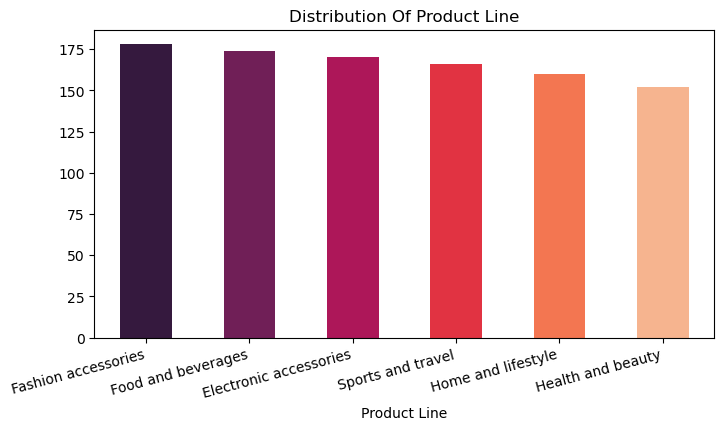

In [25]:
# create a bar plot of the 'product_line' variable
plt.figure(figsize = (8, 4))
supermarket_df.product_line.value_counts().plot(kind = 'bar', rot = 15, color = sns.color_palette('rocket', supermarket_df.product_line.nunique()))
plt.xlabel('Product Line')
plt.title('Distribution Of Product Line')
plt.xticks(ha = 'right')
plt.show()

Observation: fashion accessories are the most demanded product line while health and beauty is the least demanded product line.

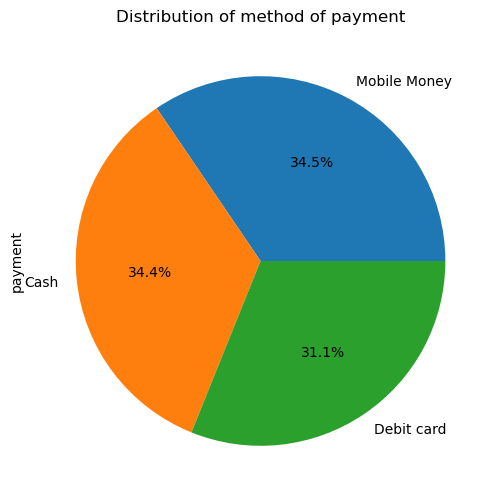

In [27]:
# create a pie chart of the 'payment' variable
plt.figure(figsize = (8,6))
supermarket_df.payment.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of method of payment')
plt.show()

Observation: Mobile money is the most common method of payment while cash is the least preffered method of payment.

4.2 BIVARIATE ANALYSIS

Getting a heatmap of the vaiables in the dataset

In [ ]:
# create a heatmap of the correlations of the variables in the dataset
#calculate the correration matrix
numeric_df = supermarket_df.select_dtypes(include=['number']).drop(columns=['gross_margin_percentage'])
corr_matrix = numeric_df.corr()
# print(corr_matrix.shape)
# numeric_df.head()

#creating a heatmap
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation heatmap of the variables')
plt.show()

Observation: The 5% tax, cost of goods sold, gross income and the total are all perfectly correlated to each other.

Using Pivot Tables 

In [39]:
#create a pivot table to show the number of orders per branch
# supermarket_df.head()
pd.pivot_table(supermarket_df, values='invoice_id', index='branch', aggfunc='count')

,invoice_id
branch,
A,340
B,332
C,328


In [44]:
# create a pivot table to find the mean of gross income per branch
pd.pivot_table(supermarket_df, values='gross_income', index='branch', aggfunc='mean').sort_values(by='gross_income', ascending=False)
# supermarket_df.head()

,gross_income
branch,
C,16.052367
B,15.232024
A,14.874001


Observation: Branch A has the lowest average gross income but has the most orders while branch C has the highest gross income but has the lowest orders.

In [43]:
pd.pivot_table(supermarket_df, values='invoice_id', index='product_line', aggfunc='count').sort_values(by='invoice_id', ascending=False)

,invoice_id
product_line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [52]:
# create a pivot table to find the average gross income per product line
pd.pivot_table(supermarket_df, values='gross_income', index='product_line', aggfunc='mean').sort_values(by='gross_income', ascending=False)

,gross_income
product_line,
Home and lifestyle,16.030331
Sports and travel,15.812630
Health and beauty,15.411572
Food and beverages,15.365310
Electronic accessories,15.220597
Fashion accessories,14.528062


Observation:  fashion accessories products are the most demanded products but have the lowest gross income. Health and lifestyle products have the highest gross income but are the second most least demanded products.

In [58]:
#Finding out the most stocked product line per branch
pd.pivot_table(supermarket_df, values='invoice_id', index='branch', columns='product_line', aggfunc={'invoice_id' : 'count'})


product_line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
branch,,,,,,
A,60,51,58,47,65,59
B,55,62,50,53,50,62
C,55,65,66,52,45,45


Observations: 
1. Branch A has the lowest average gross income per product sold while Branch C has the highest.
2. Home and lifestyle products have the highest average gross income while fashion accessories products have the lowest average gross income.

In [53]:
# get the average gross income per product line for each branch and save to a dataframe
branches = pd.pivot_table(supermarket_df, index=['branch', 'product_line'], aggfunc={'gross_income' : 'mean'})
branches = branches.reset_index()

# split the dataframe into three smaller dataframes based on branch
branch_a = branches.loc[branches['branch'] == 'A']
branch_b = branches.loc[branches['branch'] == 'B']
branch_c = branches.loc[branches['branch'] == 'C']

In [55]:
# preview the average gross income per product line for Branch A
branch_a.groupby('product_line')['gross_income'].mean()
# branch_a.head()

product_line
Electronic accessories    14.537392
Fashion accessories       15.249775
Food and beverages        14.091216
Health and beauty         12.763681
Home and lifestyle        16.422854
Sports and travel         15.635754
Name: gross_income, dtype: float64

In [56]:
# preview the average gross income per product line for Branch B
branch_b.groupby('product_line')['gross_income'].mean()

product_line
Electronic accessories    14.763155
Fashion accessories       12.606234
Food and beverages        14.490370
Health and beauty         17.952075
Home and lifestyle        16.713490
Sports and travel         15.351919
Name: gross_income, dtype: float64

In [ ]:
# preview the average gross income per product line for Branch C
branch_c.groupby('product_line')['gross_income'].mean()

In [ ]:
# create a pivot table to find the average rating per branch
pd.pivot_table(supermarket_df, values='rating', index='branch', aggfunc='mean')
# supermarket_df.head()

In [ ]:
# create a pivot table to find the average rating per product_line
pd.pivot_table(supermarket_df, values='rating', index='product_line', aggfunc='mean')

Observations: 
food and beverages has the highest rating of the product line. Branch C has the highest rating of the three branches.

In [ ]:
# get the average rating per product line for each branch and save to a dataframe
ratings = pd.pivot_table(supermarket_df, index=['branch', 'product_line'], aggfunc={'rating' : 'mean'})
ratings = ratings.reset_index()
print(ratings)

# split dataframe into smaller dataframes based on branch
ratings_a = ratings.loc[ratings['branch'] == 'A']
ratings_b = ratings.loc[ratings['branch'] == 'B']
ratings_c = ratings.loc[ratings['branch'] == 'C']

In [ ]:
# preview the average ratings per product line for Branch A
pd.pivot_table(ratings_a, index=['branch', 'product_line'], aggfunc={'rating' : 'mean'}).reset_index()
# pd.pivot_table(supermarket_df, index = )

In [ ]:
# preview the average ratings per product line for Branch B
pd.pivot_table(ratings_b, index=['branch', 'product_line'], aggfunc={'rating' : 'mean'})

In [ ]:
# preview the average ratings per product line for Branch C
pd.pivot_table(ratings_c, index=['branch', 'product_line'], aggfunc={'rating': 'mean'})

Observations:
sports and travel have the highest rating for branch A, fashion accessories have the highest rating for branches B and C, Fashion accessories are the lowest rated for branch B.